In [1]:
#pip install gensim

In [2]:
#pip install scipy

In [3]:
#pip install triu

In [4]:
from gensim.models import Word2Vec

In [5]:
sentences = [
    "The quick brown fox jumps over the lazy dog." ,
    "I like eating apples and bananas." , 
    "Natural Language Processing is a fascinating field."
]

In [6]:
from nltk.tokenize import word_tokenize

In [7]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [8]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'Language', 'Processing', 'is', 'a', 'fascinating', 'field', '.']]

In [9]:
model = Word2Vec(final_data , min_count=1 , vector_size=10)        #create the objecct

In [10]:
model.wv["apples"]

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [11]:
model.wv["bananas"]

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [12]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        print(f"Word Embedding for '{word}' : {word_embedding}")
    except KeyError:
        print(f"Word '{word}' not found in the vocabulary.")

In [13]:
get_embedding("fox")

Word Embedding for 'fox' : [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [14]:
get_embedding("apple")

Word 'apple' not found in the vocabulary.


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
cosine_similarity(model.wv["apples"].reshape(1,-1),
                  model.wv["bananas"].reshape(1,-1))

array([[0.1897796]], dtype=float32)

In [17]:
cosine_similarity(model.wv["fox"].reshape(1,-1),
                  model.wv["dog"].reshape(1,-1))

array([[0.2238495]], dtype=float32)

In [18]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to
[nltk_data]     C:\Users\dai\AppData\Roaming\nltk_data...
[nltk_data]   Package abc is already up-to-date!


True

In [19]:
from nltk.corpus import abc

In [20]:
sents = abc.sents()

In [21]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [22]:
len(sents)

29059

In [23]:
## create the object
model = Word2Vec(sents , min_count=1 , vector_size=10)

In [24]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [25]:
len(model.wv.key_to_index)

31885

In [26]:
data = model.wv.most_similar('science')
print(data)

[('authority', 0.9834930300712585), ('capitalise', 0.9745168089866638), ('Dubbo', 0.9717874526977539), ('arousal', 0.971077561378479), ('Hofmann', 0.9699931740760803), ('leading', 0.9698442220687866), ('Women', 0.9653699994087219), ('nurse', 0.9650853872299194), ('bulk', 0.9645991325378418), ('publisher', 0.9620440006256104)]


In [27]:
data = model.wv.most_similar('publisher')
print(data)

[('science', 0.9620438814163208), ('Dubbo', 0.9570584297180176), ('slash', 0.9570438265800476), ('earth', 0.9563243389129639), ('eliminating', 0.9547692537307739), ('tanning', 0.9546430706977844), ('Parkinson', 0.9519972205162048), ('glands', 0.9511300325393677), ('capitalise', 0.9489915370941162), ('triple', 0.9483112692832947)]


In [28]:
model.wv["science"] , model.wv["publisher"]

(array([ 0.13982621,  0.14527895,  2.3080072 ,  0.04890282, -0.36340758,
        -0.61443096,  1.726412  ,  1.1310205 , -1.3789973 , -0.40868396],
       dtype=float32),
 array([-0.00045724, -0.01240771,  0.21720694,  0.02543465, -0.08139969,
        -0.07379601,  0.160106  ,  0.04753344, -0.1612126 , -0.06125492],
       dtype=float32))

In [29]:
cosine_similarity(model.wv["science"].reshape(1,-1),model.wv["publisher"].reshape(1,-1))

array([[0.9620439]], dtype=float32)

In [30]:
### Reading data and train Word2Vec

In [31]:
import json
with open(r'C:/Users\dai\Desktop\NLP\daywise_lab\day10\intents.json') as f:
    data = json.load(f)

In [32]:
type(data)

list

In [33]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [34]:
data[0]["patterns"]

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [35]:
import pandas as pd
df = pd.DataFrame(data)

In [36]:
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [37]:
df['patterns'][2]

['Thanks for helping me',
 'Thank your guidance',
 "That's helpful and kind from you"]

In [38]:
df["patterns"] = df["patterns"].apply(', '.join)

In [39]:
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","[See you later, thanks for visiting, have a gr..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"Can I pay using credit card?, Can I pay using...","[We accept VISA, Mastercard and credit card, W..."


In [40]:
from nltk.corpus import stopwords
import string
from textblob import Word
stop = stopwords.words("english")
df["patterns"] = df["patterns"].apply(
    lambda x:' '.join(x.lower() for x in x.split()))
df["patterns"] = df["patterns"].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if x not in string.punctuation))
df["patterns"] = df["patterns"].str.replace('[^\w\s]','')
df["patterns"] = df["patterns"].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if not x.isdigit()))
df["patterns"] = df["patterns"].apply(
    lambda x:' '.join(x for x in word_tokenize(x) if not x in stop))
df["patterns"] = df["patterns"].apply(
    lambda x:' '.join([Word(word).lemmatize(pos='v') for word in word_tokenize(x)]))


In [41]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [42]:
## taking the outer list
bigger_list =[]
for i in df['patterns']:
    li = i.split()
    bigger_list.append(li)

In [43]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [44]:
#Custom data is fed to machine for further processing
model = Word2Vec(bigger_list,min_count=1,vector_size=2)
print(model)

Word2Vec<vocab=29, vector_size=2, alpha=0.025>


In [45]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [46]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [47]:
model.wv.key_to_index.keys()

dict_keys(['pay', 'open', 'use', 'hi', 'time', 'thank', 'hello', 'talk', 'soon', 'one', 'bye', 'see', 'later', 'goodbye', 'come', 'back', 'available', 'cash', 'help', 'mastercard', "'s", 'helpful', 'kind', 'hours', 'tell', 'please', 'credit', 'card', 'guidance'])

In [48]:
words = list(model.wv.key_to_index.keys())

In [49]:
import matplotlib.pyplot as plt
import numpy as np
vectors = []
for word in words:
    vect = model.wv[word]
    vectors.append(list(vect))


In [50]:
np.array(vectors)

array([[-0.02651391,  0.01156701],
       [ 0.25526112,  0.45090607],
       [-0.46515337, -0.35582092],
       [ 0.32294363,  0.4486494 ],
       [-0.2507714 , -0.18816859],
       [ 0.36877084, -0.07690762],
       [-0.22683066,  0.32770258],
       [-0.24300802, -0.09080088],
       [ 0.14380899,  0.04965185],
       [-0.41426075, -0.4724409 ],
       [ 0.36533156,  0.25365862],
       [ 0.3375778 ,  0.0384436 ],
       [ 0.31745085, -0.17025824],
       [-0.0474354 ,  0.28846955],
       [-0.37631938, -0.19679889],
       [-0.37573153, -0.04656664],
       [ 0.47690594, -0.36595833],
       [-0.11668843, -0.09688705],
       [ 0.40388986, -0.29662946],
       [ 0.00213489, -0.23767537],
       [-0.48039246,  0.25032294],
       [-0.43807694, -0.21959437],
       [-0.00180655, -0.0148912 ],
       [-0.38314208,  0.48097077],
       [ 0.24910289,  0.46165717],
       [-0.40802845,  0.22491622],
       [-0.20685782,  0.04131208],
       [ 0.4248581 , -0.22306798],
       [ 0.22575632,

In [51]:
vectors = pd.DataFrame(vectors , columns=['x','y'])

In [52]:
#vectors

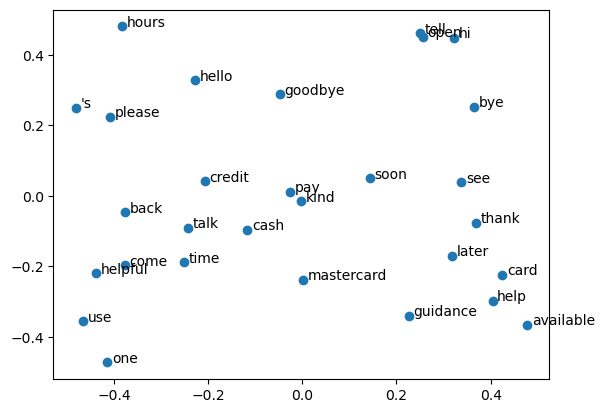

In [53]:
plt.scatter(vectors['x'] , vectors['y'] )
for i in range(len(words)):
    plt.annotate(xy = (vectors.loc[i,'x'] + 0.01 , vectors.loc[i,'y']) , text = words[i])

In [54]:
dissimilar_words = model.wv.doesnt_match(
    '''see you later , thanks for visiting'''.split())
print(dissimilar_words)

see
